In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [4]:
evaluation_path = '../evaluation/'
evaluation_summary_path = f'{evaluation_path}evaluation_summary.csv'

evaluation_summary = pd.read_csv(evaluation_summary_path)

In [5]:
evaluation_summary.head()

,Model,Dataset,Skeleton Encoder Layers,Loss Version,Minimum Support,Maximum Support,Total Entries,Match Sum,Match Percentage
0,mmsr,train_nc,NaN,NaN,-30,-10,228,17,7.456140
1,mmsr,train_nc,NaN,NaN,-29,-9,228,11,4.824561
2,mmsr,train_nc,NaN,NaN,-28,-8,228,14,6.140351
3,mmsr,train_nc,NaN,NaN,-27,-7,229,20,8.733624
4,mmsr,train_nc,NaN,NaN,-26,-6,230,24,10.434783


In [7]:
mmsr_newloss_eval = evaluation_summary[evaluation_summary['Model'] == 'mmsr_se5_newloss']
mmsr_newloss_eval.head()

,Model,Dataset,Skeleton Encoder Layers,Loss Version,Minimum Support,Maximum Support,Total Entries,Match Sum,Match Percentage
43,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,234,43,18.376068
44,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,233,45,19.313305
45,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,234,42,17.948718
46,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,234,43,18.376068
47,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,232,44,18.965517


In [12]:
variances = mmsr_newloss_eval.groupby('Minimum Support')['Match Percentage'].var()

In [18]:
def gaussian(x, mean, std_dev):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

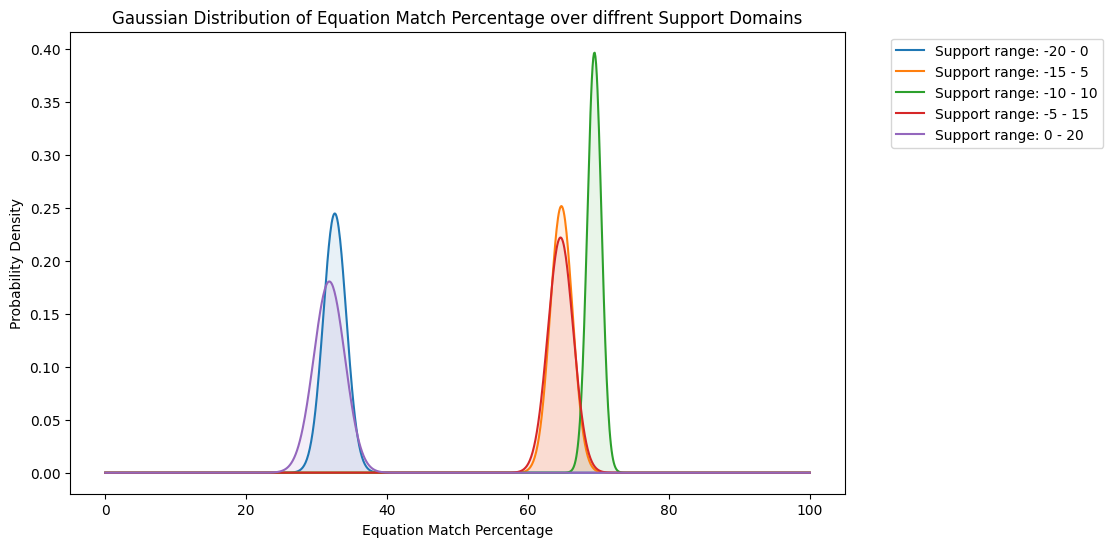

In [36]:
i = 0

plt.figure(figsize=(10, 6))

for min_support, variance in variances.items():
    i += 1
    if not i % 5 == 0:
        continue
    match_percentage = mmsr_newloss_eval[mmsr_newloss_eval['Minimum Support'] == min_support]['Match Percentage'].mean()
    if np.isnan(variance):  # Skip if variance is NaN
        continue
    std_dev = np.sqrt(variance) 
    x = np.linspace(0, 100, 1000)
    y = gaussian(x, match_percentage, std_dev)
    plt.plot(x, y, label=f'Support range: {min_support} - {min_support + 20}')
    plt.fill_between(x, y, alpha=0.1)

plt.title('Gaussian Distribution of Equation Match Percentage over diffrent Support Domains')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Equation Match Percentage')
plt.ylabel('Probability Density')
plt.show()